#Przegląd

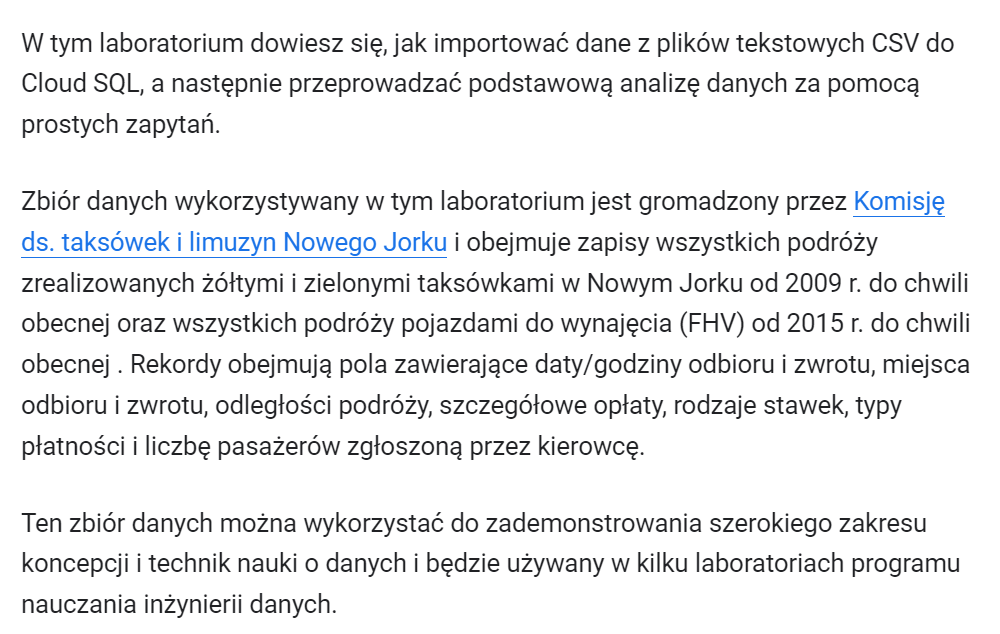

https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [ ]:
# yellow_tripdata_2023-07.parquet

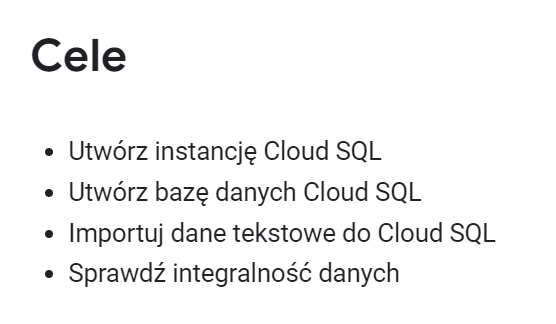

#Zadanie 1. Przygotowanie środowiska

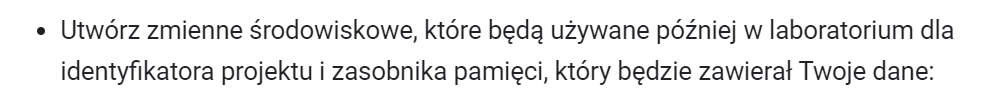

In [ ]:
export PROJECT_ID=$(gcloud info --format='value(config.project)')
export BUCKET=${PROJECT_ID}-ml

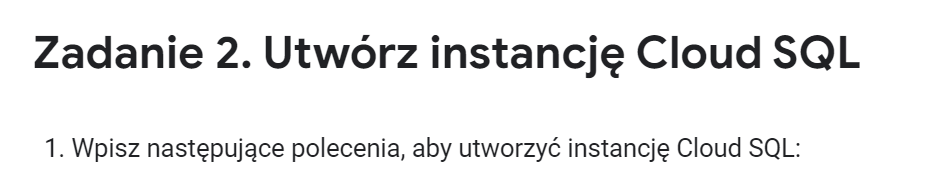

In [ ]:
gcloud sql instances create taxi \
    --tier=db-n1-standard-1 --activation-policy=ALWAYS

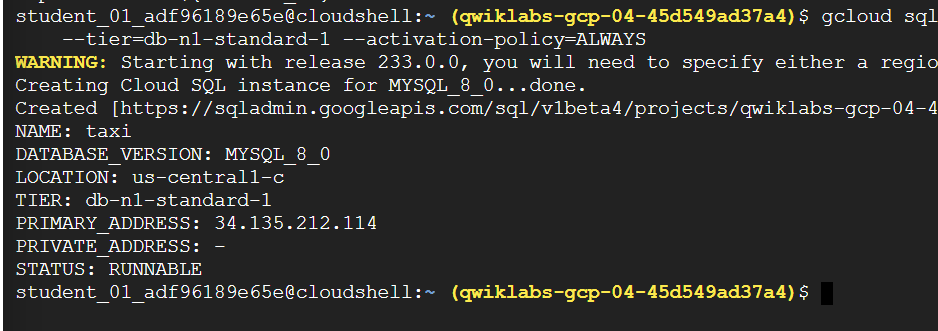

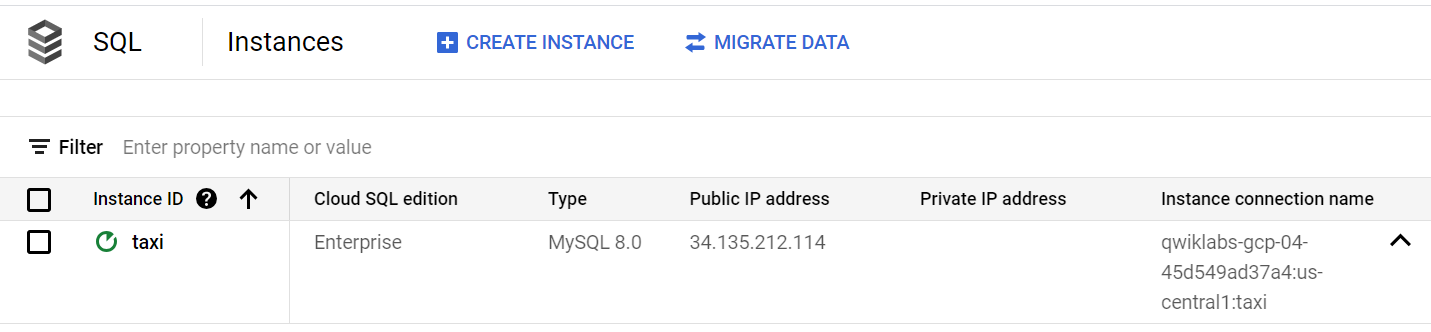

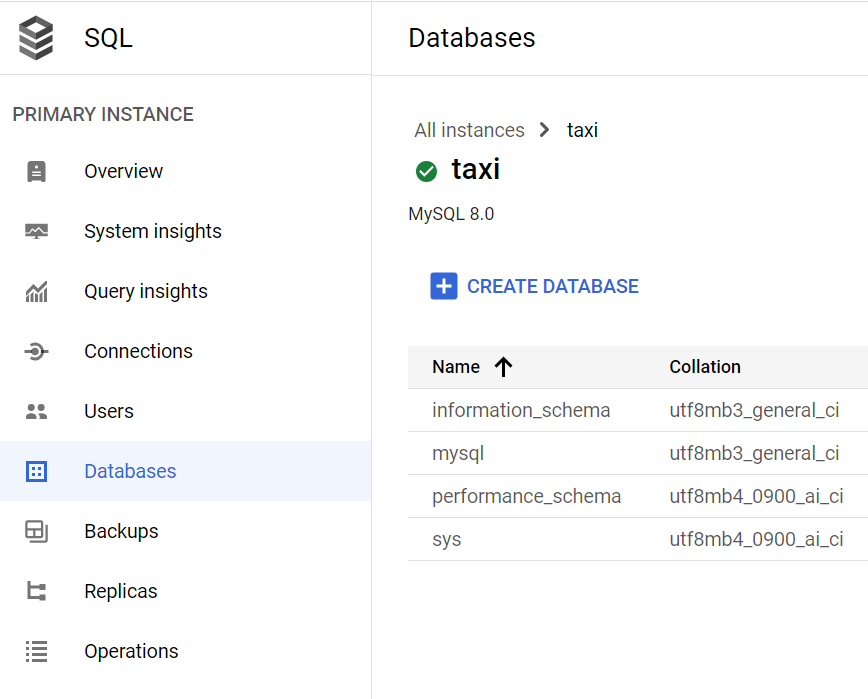

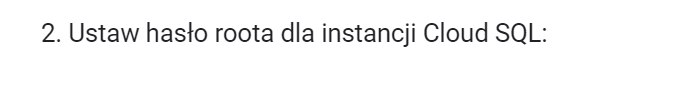

In [ ]:
gcloud sql users set-password root --host % --instance taxi \
 --password Passw0rd

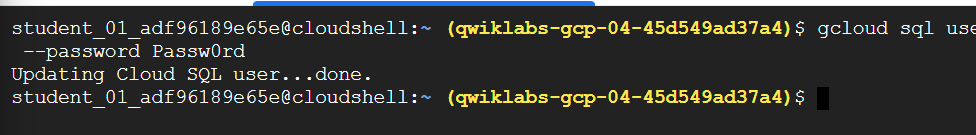

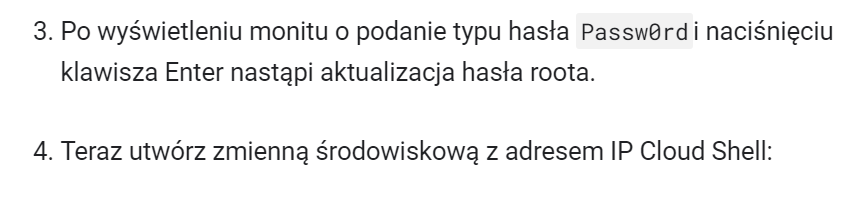

In [ ]:
export ADDRESS=$(wget -qO - http://ipecho.net/plain)/32

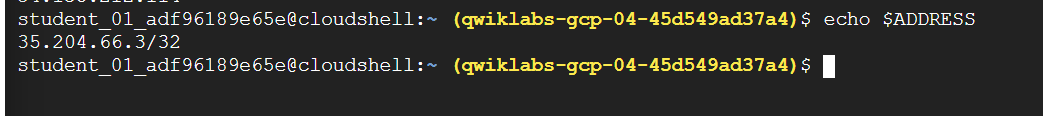

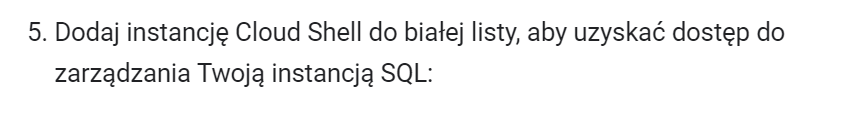

In [ ]:
gcloud sql instances patch taxi --authorized-networks $ADDRESS

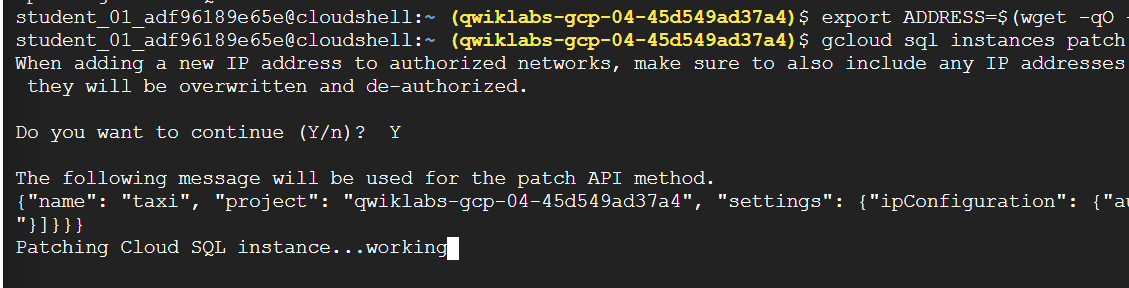

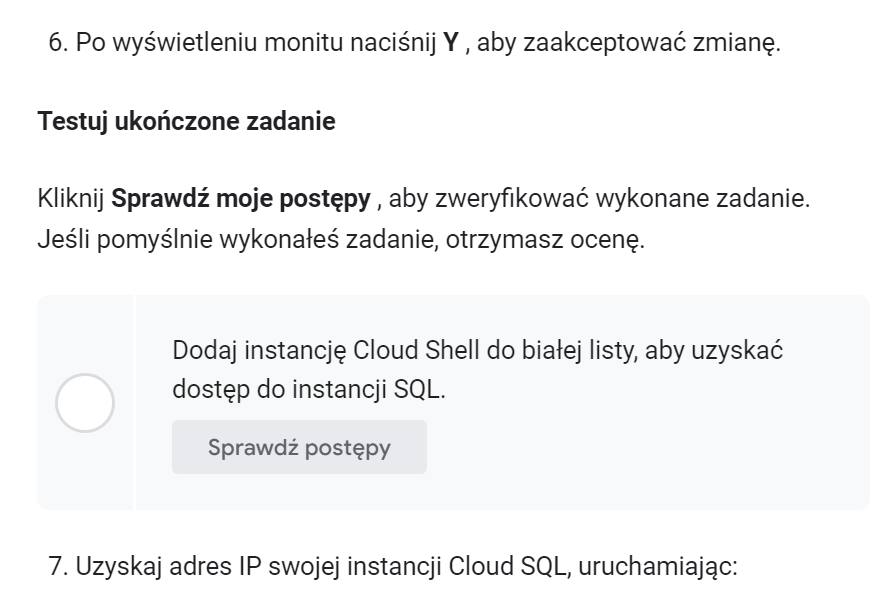

In [ ]:
MYSQLIP=$(gcloud sql instances describe \
taxi --format="value(ipAddresses.ipAddress)")

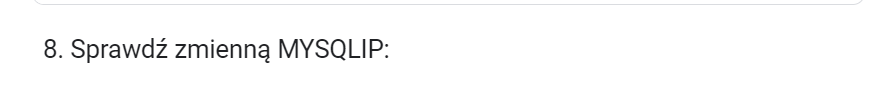

In [ ]:
echo $MYSQLIP

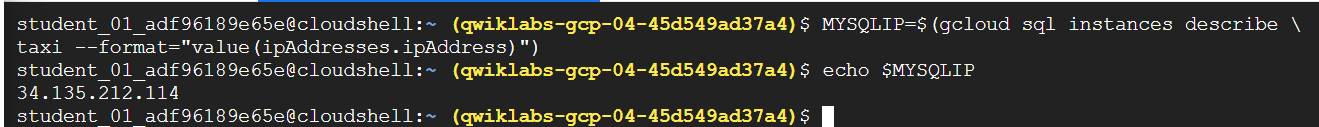

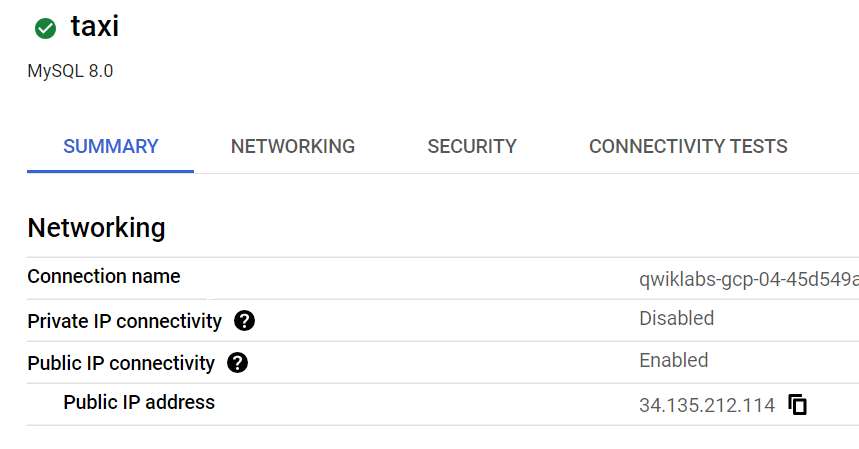

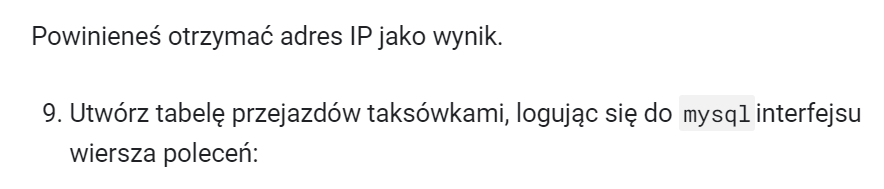

In [ ]:
mysql --host=$MYSQLIP --user=root \
      --password --verbose

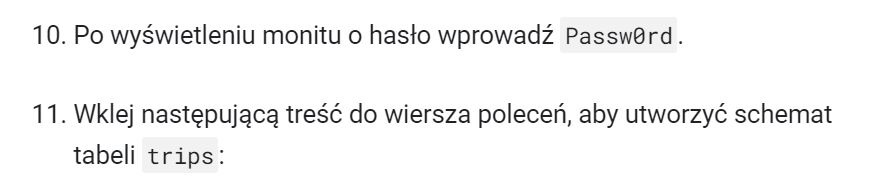

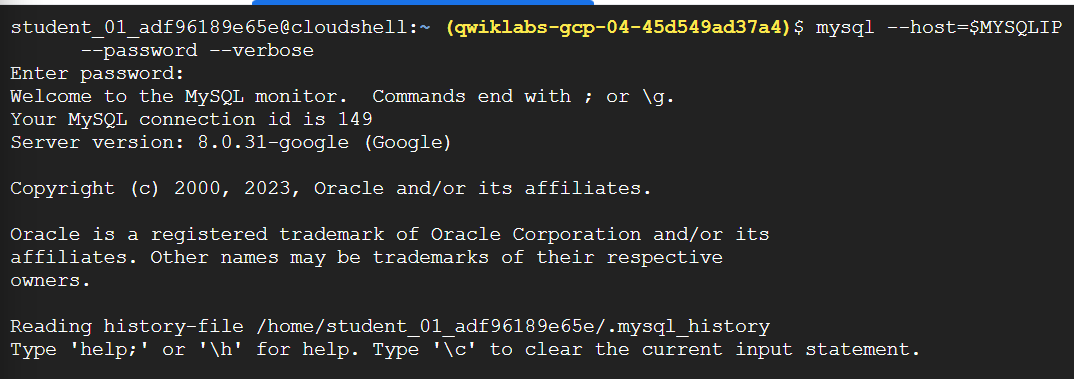

In [ ]:
create database if not exists bts;

use bts;

drop table if exists trips;

create table trips (
  vendor_id VARCHAR(16),
  pickup_datetime DATETIME,
  dropoff_datetime DATETIME,
  passenger_count INT,
  trip_distance FLOAT,
  rate_code VARCHAR(16),
  store_and_fwd_flag VARCHAR(16),
  payment_type VARCHAR(16),
  fare_amount FLOAT,
  extra FLOAT,
  mta_tax FLOAT,
  tip_amount FLOAT,
  tolls_amount FLOAT,
  imp_surcharge FLOAT,
  total_amount FLOAT,
  pickup_location_id VARCHAR(16),
  dropoff_location_id VARCHAR(16)
);

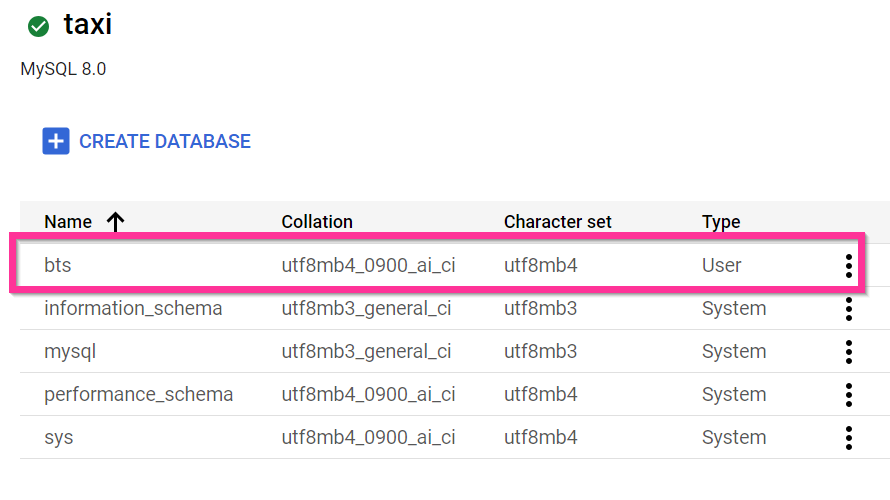

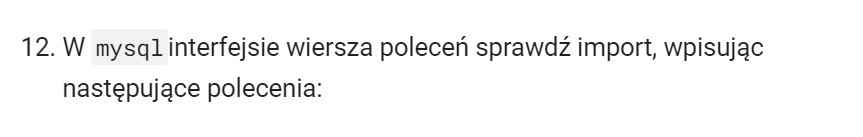

In [ ]:
describe trips;

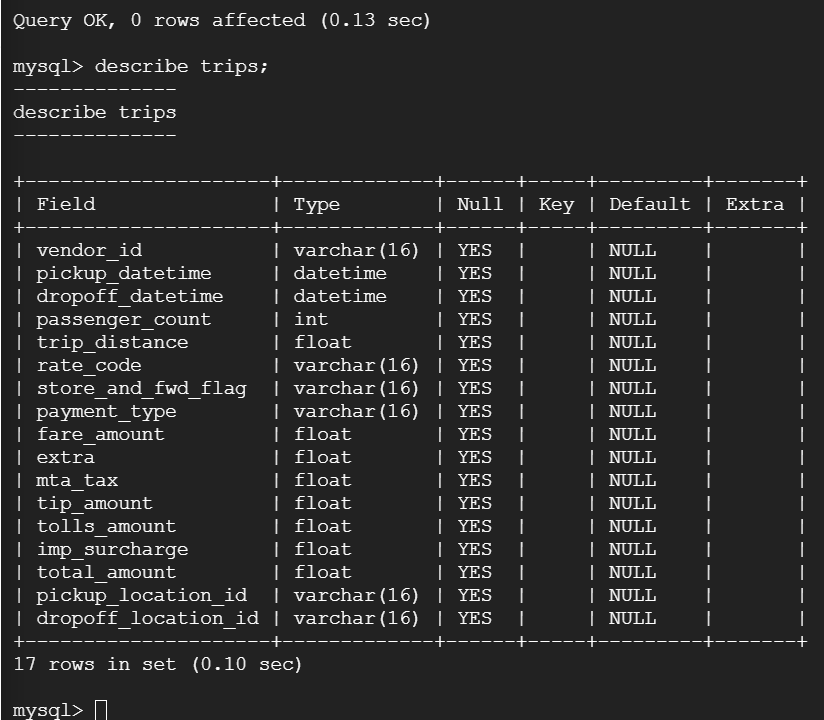

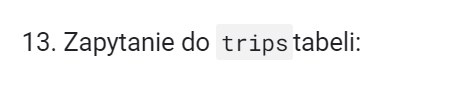

In [ ]:
select distinct(pickup_location_id) from trips;

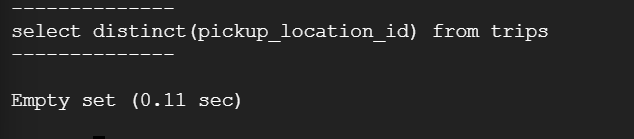

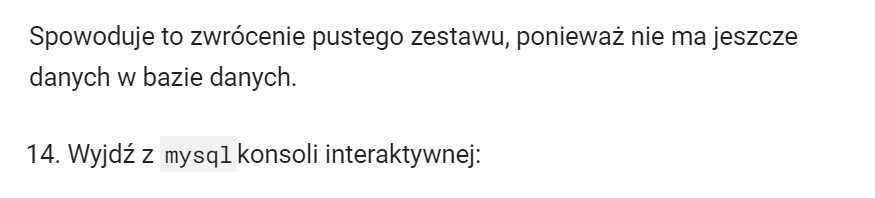

In [ ]:
exit

#Zadanie 3. Dodaj dane do instancji Cloud SQL

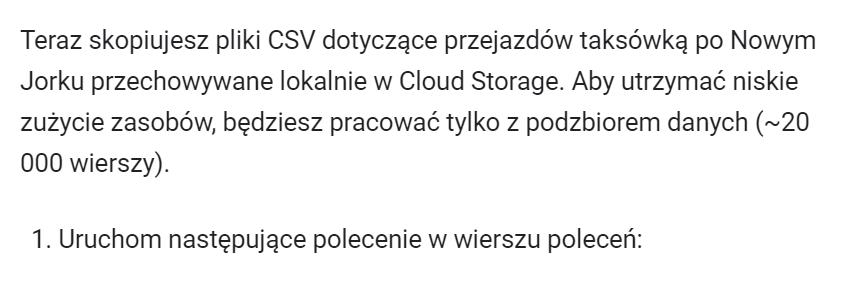

In [ ]:
gcloud storage cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_1.csv trips.csv-1
gcloud storage cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_2.csv trips.csv-2

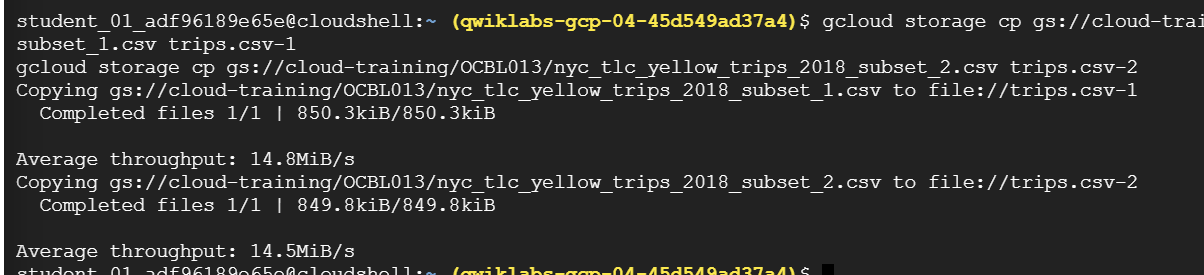

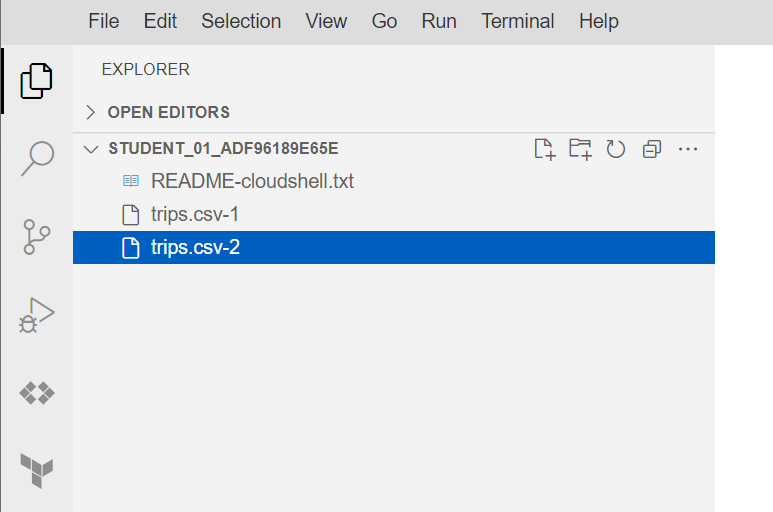

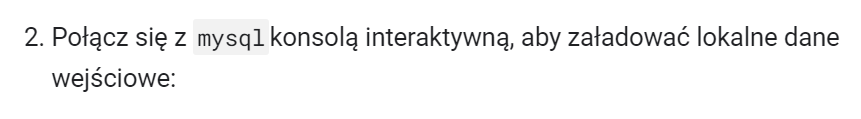

In [ ]:
mysql --host=$MYSQLIP --user=root  --password  --local-infile

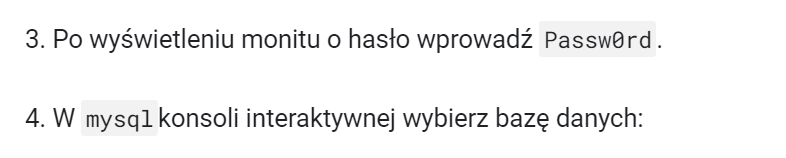

In [ ]:
use bts;

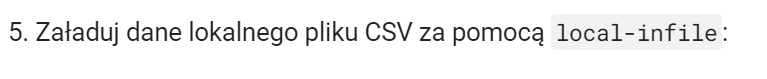

trips.csv-1

In [ ]:
LOAD DATA LOCAL INFILE 'trips.csv-1' INTO TABLE trips
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES
(vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id);

trips.csv-2

In [ ]:
LOAD DATA LOCAL INFILE 'trips.csv-2' INTO TABLE trips
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES
(vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id);

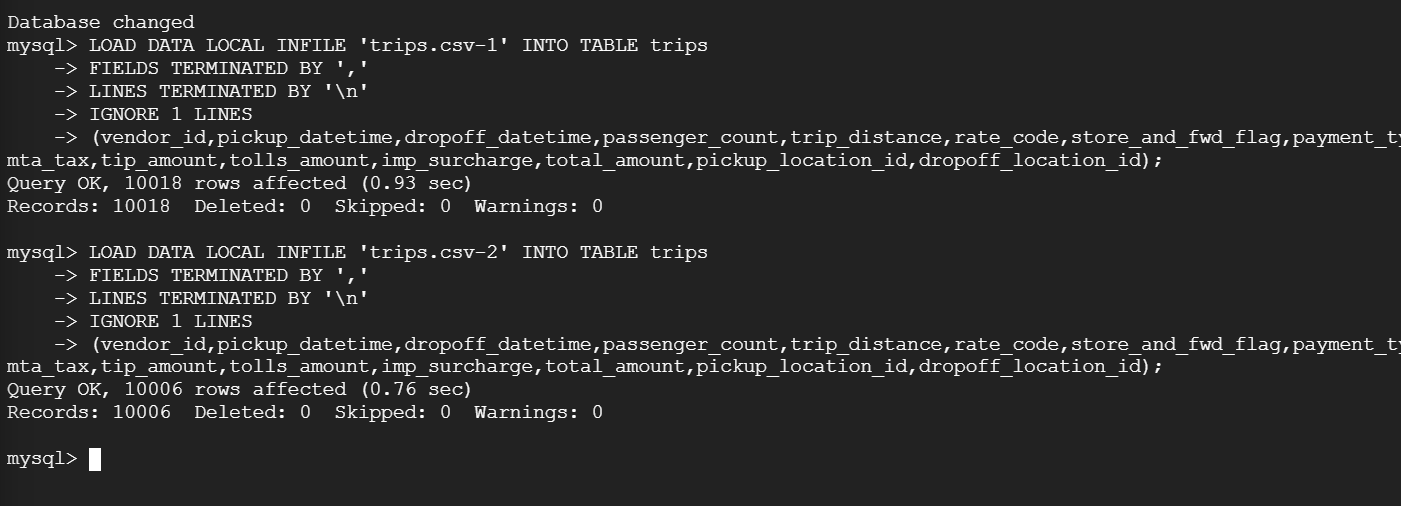

#Zadanie 4. Sprawdzenie integralności danych

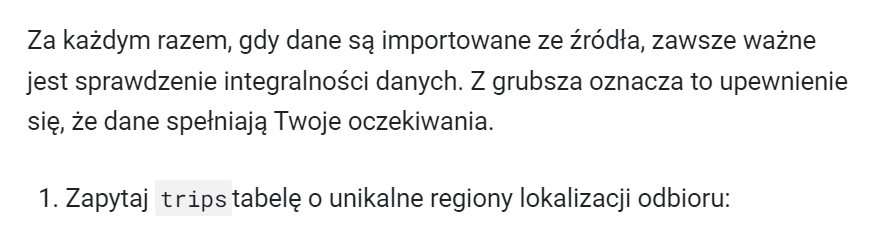

In [ ]:
select distinct(pickup_location_id) from trips;

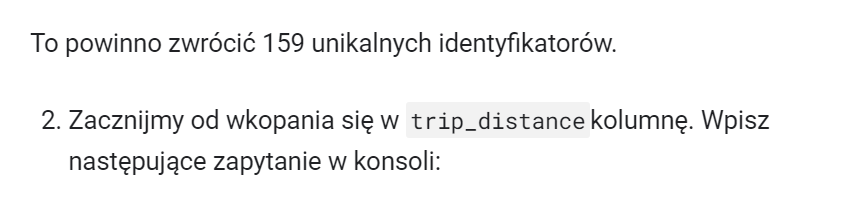

In [ ]:
select
  max(trip_distance),
  min(trip_distance)
from
  trips;

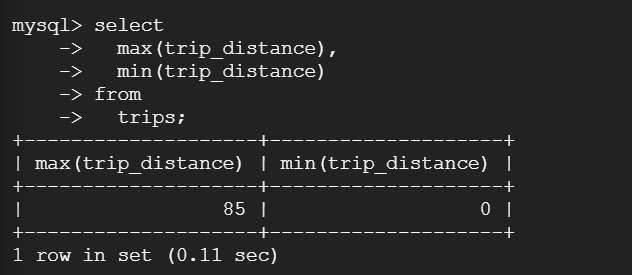

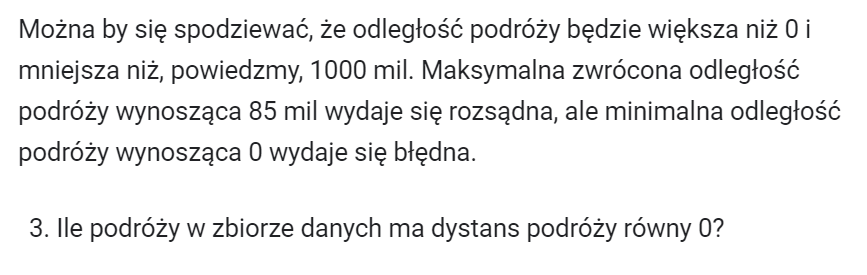

In [ ]:
select count(*) from trips where trip_distance = 0;

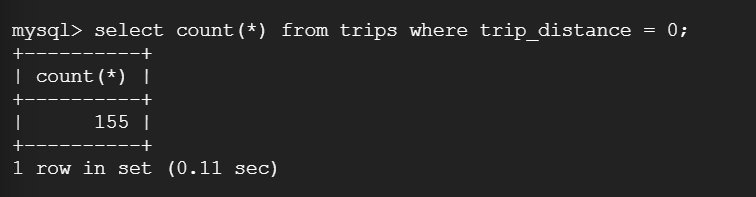

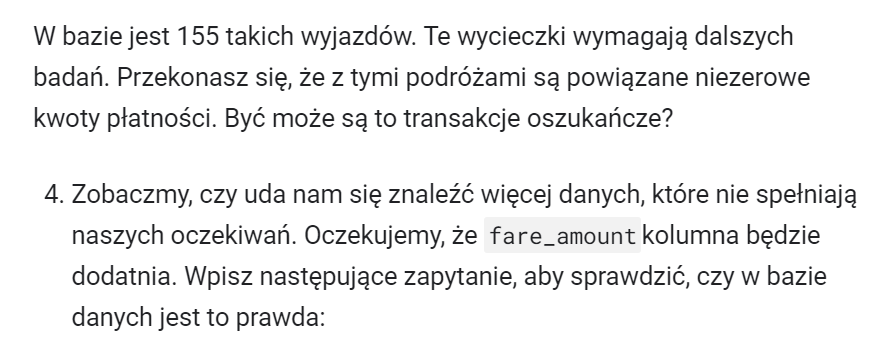

In [ ]:
select count(*) from trips where fare_amount < 0;

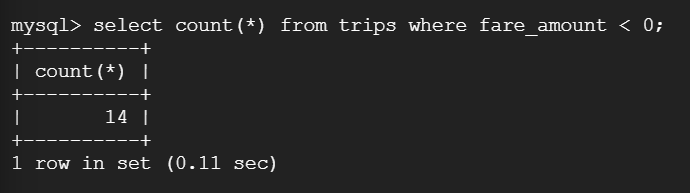

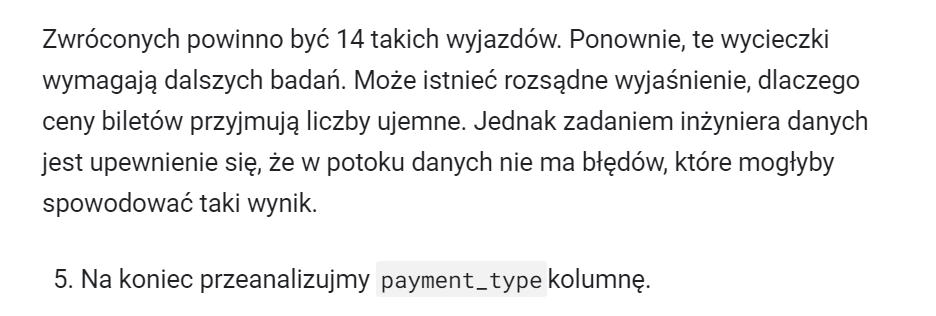

In [ ]:
select
  payment_type,
  count(*)
from
  trips
group by
  payment_type;

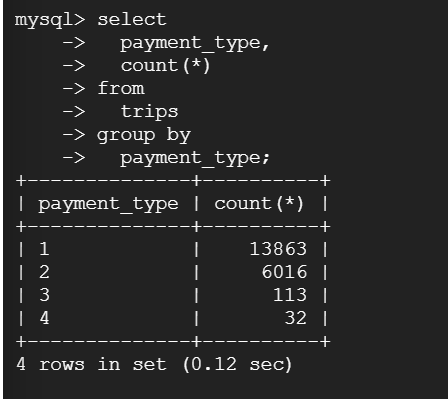

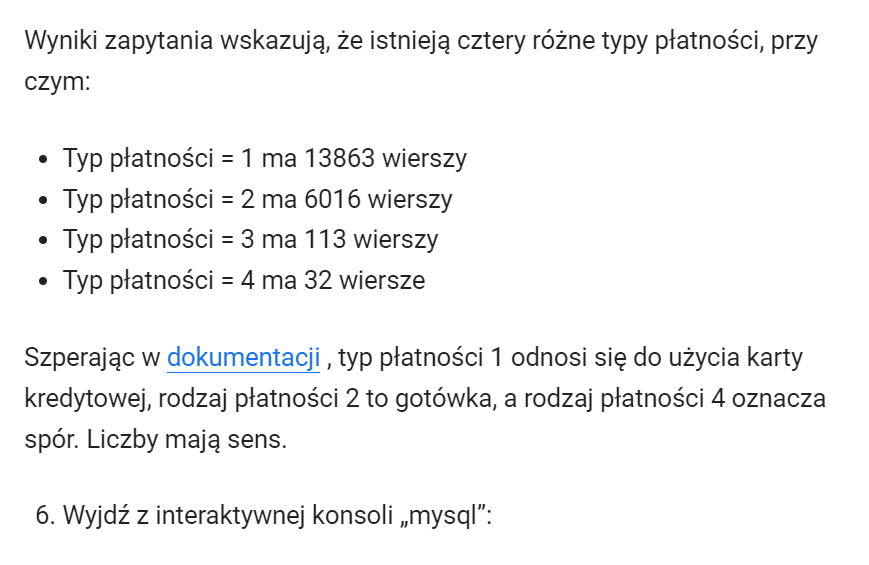

In [ ]:
exit

Statystyki zapytań

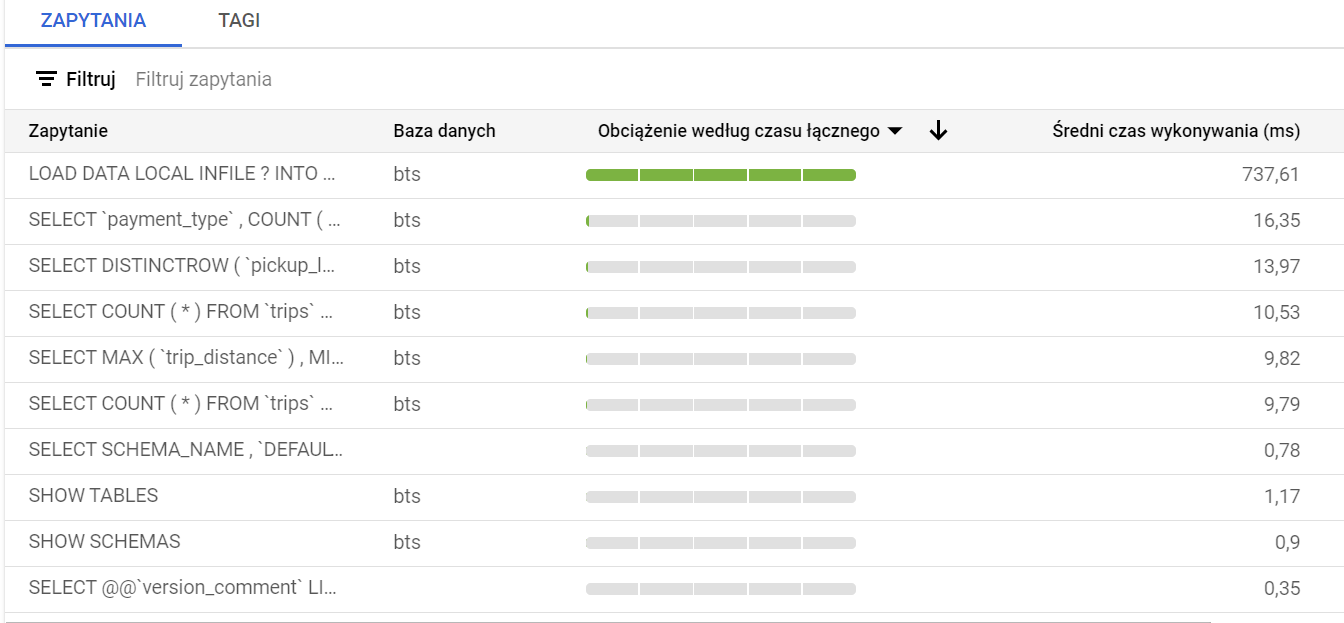